# MACHINE LEARNING PROJECT

## GROUP MEMBERS:
### AYESHA (21B-031-SE)
### MUHAMMAD AHMED (21B-223-SE)
### MUNEEB ALI (21B-041-SE)

## IMPORTING LIBRARIES:

### Importing all neccessary libraries needed for EDA , Preprocessing and evaluation.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

## IMPORTING DATASET:

### The label column contains categorical data representing different crops. The dataset provides recommendations for specific crops based on the given soil and weather conditions.

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## DATA UNDERSTANDING AND CLEANING:

In [4]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values[missing_values > 0])

# Check for duplicates
num_duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", num_duplicates)

if num_duplicates > 0:
    duplicate_rows = df[df.duplicated()]
    print("\nDuplicate Rows:\n", duplicate_rows)

# Data types
data_types = df.dtypes
print("\nData Types of Each Column:\n", data_types)

# Check for outliers using summary statistics
summary_stats = df.describe().transpose()
print("\nSummary Statistics of the Dataset:\n", summary_stats)

# Optionally, to format the summary statistics output more neatly
with pd.option_context('display.float_format', '{:.2f}'.format):
    print("\nFormatted Summary Statistics of the Dataset:\n", summary_stats)


Missing Values in Each Column:
 Series([], dtype: int64)

Number of Duplicate Rows: 0

Data Types of Each Column:
 N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Summary Statistics of the Dataset:
               count        mean        std        min        25%        50%  \
N            2200.0   50.551818  36.917334   0.000000  21.000000  37.000000   
P            2200.0   53.362727  32.985883   5.000000  28.000000  51.000000   
K            2200.0   48.149091  50.647931   5.000000  20.000000  32.000000   
temperature  2200.0   25.616244   5.063749   8.825675  22.769375  25.598693   
humidity     2200.0   71.481779  22.263812  14.258040  60.261953  80.473146   
ph           2200.0    6.469480   0.773938   3.504752   5.971693   6.425045   
rainfall     2200.0  103.463655  54.958389  20.211267  64.551686  94.867624   

                 

### UNIQUE LABEL COLUMNS:

In [6]:
# Check for unique label values
if 'label' in df.columns:
    unique_labels = df['label'].unique()
    print("Unique Label Values in 'label' Column:")
    for label in unique_labels:
        print(label)
else:
    print("The DataFrame does not contain a 'label' column.")


Unique Label Values in 'label' Column:
rice
maize
chickpea
kidneybeans
pigeonpeas
mothbeans
mungbean
blackgram
lentil
pomegranate
banana
mango
grapes
watermelon
muskmelon
apple
orange
papaya
coconut
cotton
jute
coffee


### SELECTING SPECIFIC LABEL VALUES (FRUITS):

In [7]:
# banana
# mango
# watermelon
# apple
# papaya
# orange

df_fruits = df.query("label in ['banana', 'apple', 'mango', 'watermelon', 'papaya', 'orange']")
df_fruits.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1000,91,94,46,29.367924,76.249001,6.149934,92.828409,banana
1001,105,95,50,27.333690,83.676752,5.849076,101.049479,banana
1002,108,92,53,27.400536,82.962213,6.276800,104.937800,banana
1003,86,76,54,29.315908,80.115857,5.926825,90.109781,banana
1004,80,77,49,26.054330,79.396545,5.519088,113.229737,banana


In [8]:
crop_names = df_fruits['label'].unique()

print("Unique Crop Names:")
for name in crop_names:
    print(name)

Unique Crop Names:
banana
mango
watermelon
apple
orange
papaya


# i. EDA (EXPLORATORY DATA ANALYSIS)

## DATA VISUALIZATION:

### In a box plot, the dataset or DataFrame provides values for each feature. Values falling within the boxplot represent conditions that are suitable and recommended for crop cultivation.

### Boxplot Used to visualize the distribution of numerical features across different crops.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


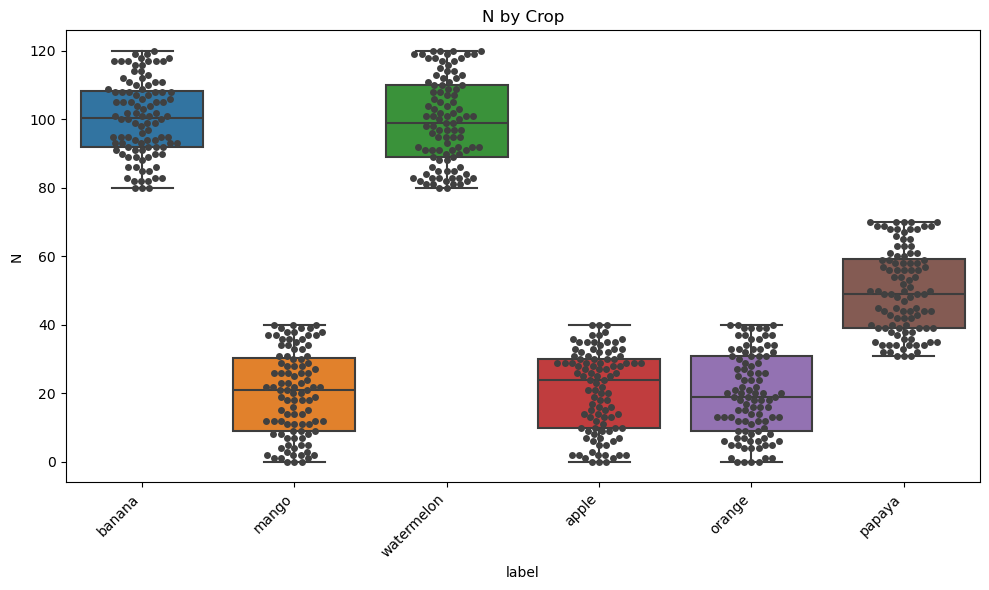

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


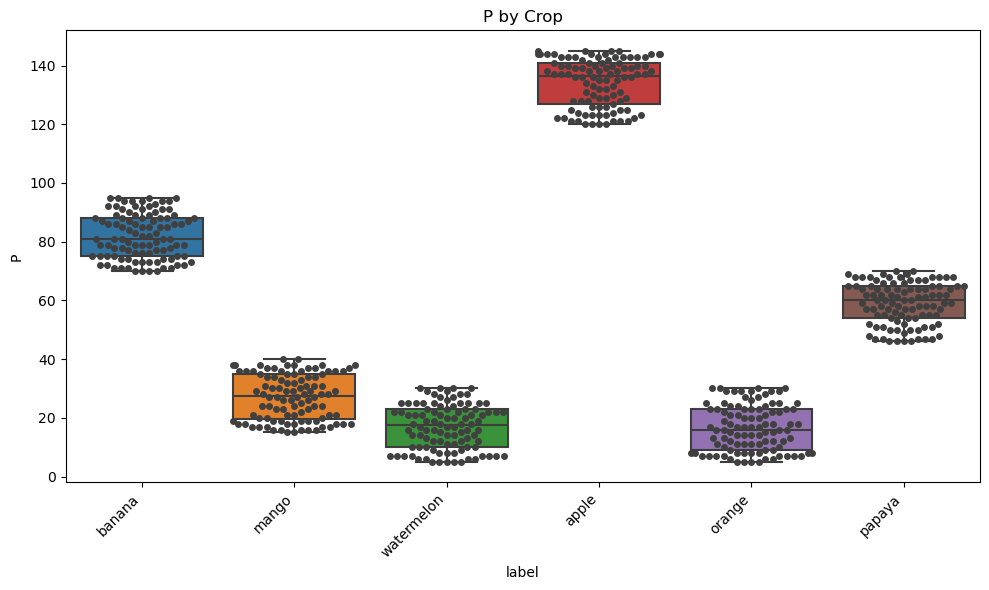

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 

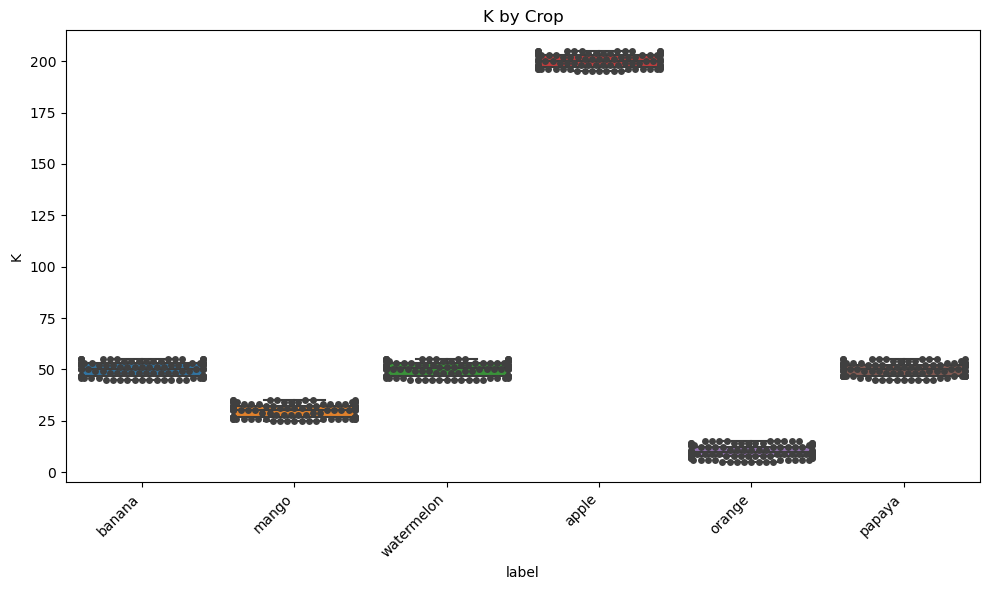

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 

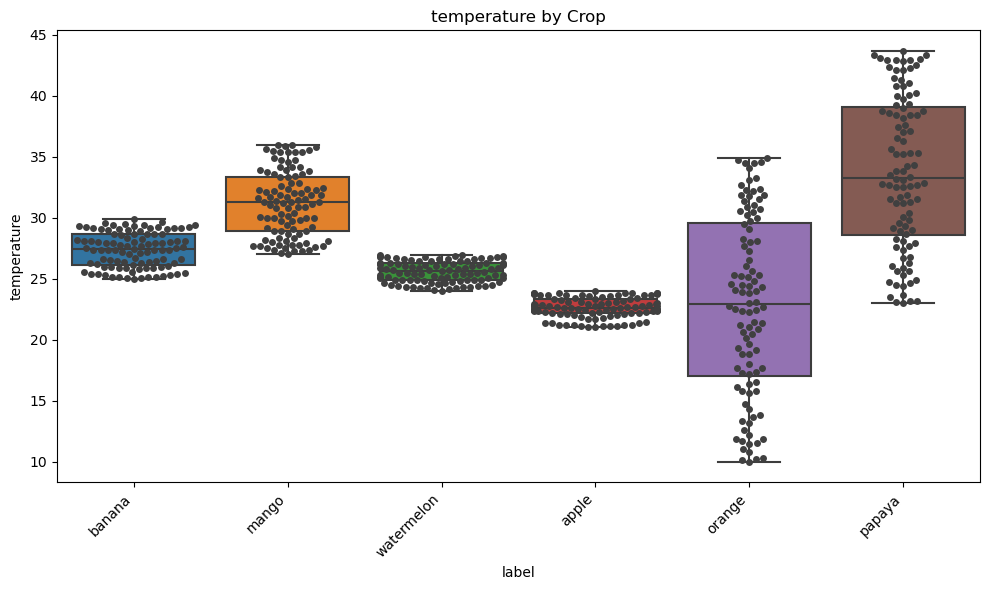

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 

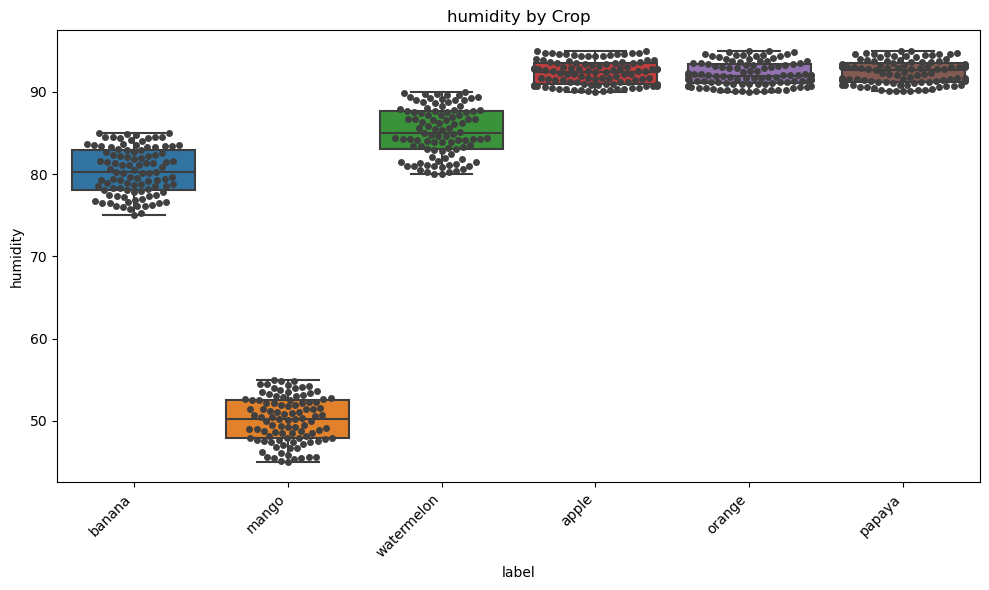

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


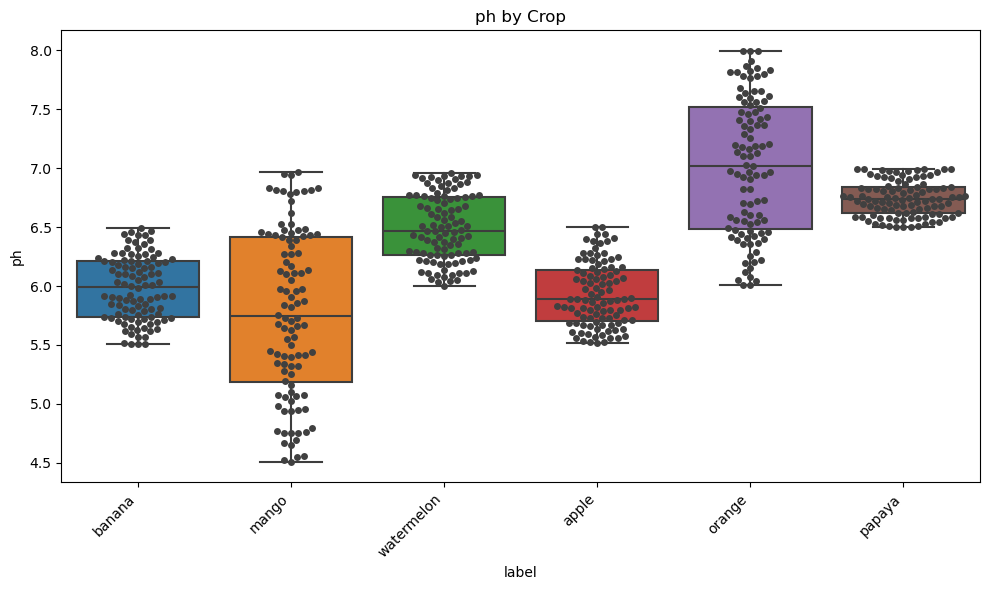

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 2

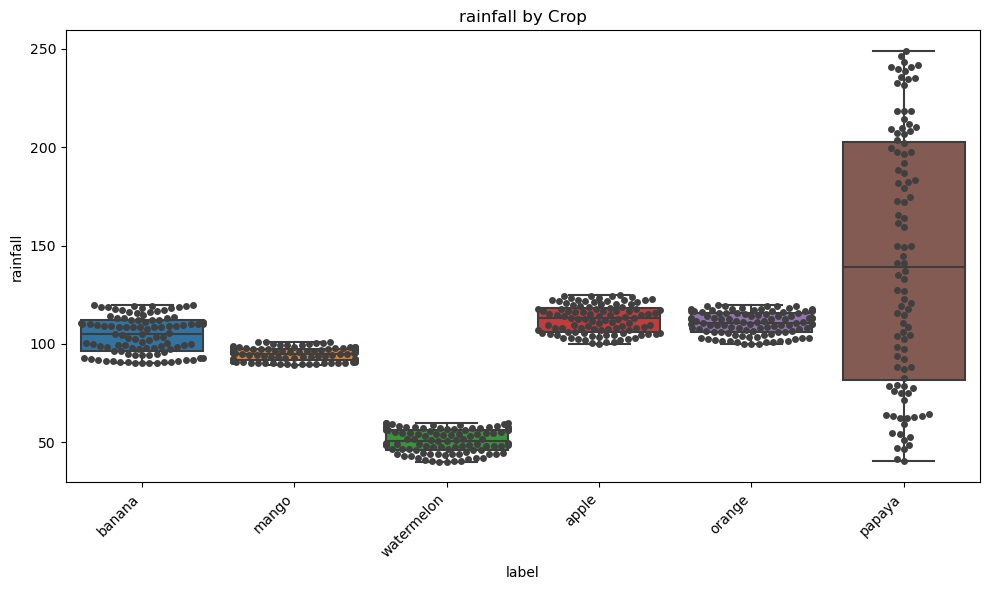

In [9]:
# Assuming 'df_fruits' is your DataFrame and 'features' is defined
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Plot each feature separately
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=df_fruits)
    sns.swarmplot(x='label', y=feature, data=df_fruits, color=".25")
    plt.title(f'{feature} by Crop')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 

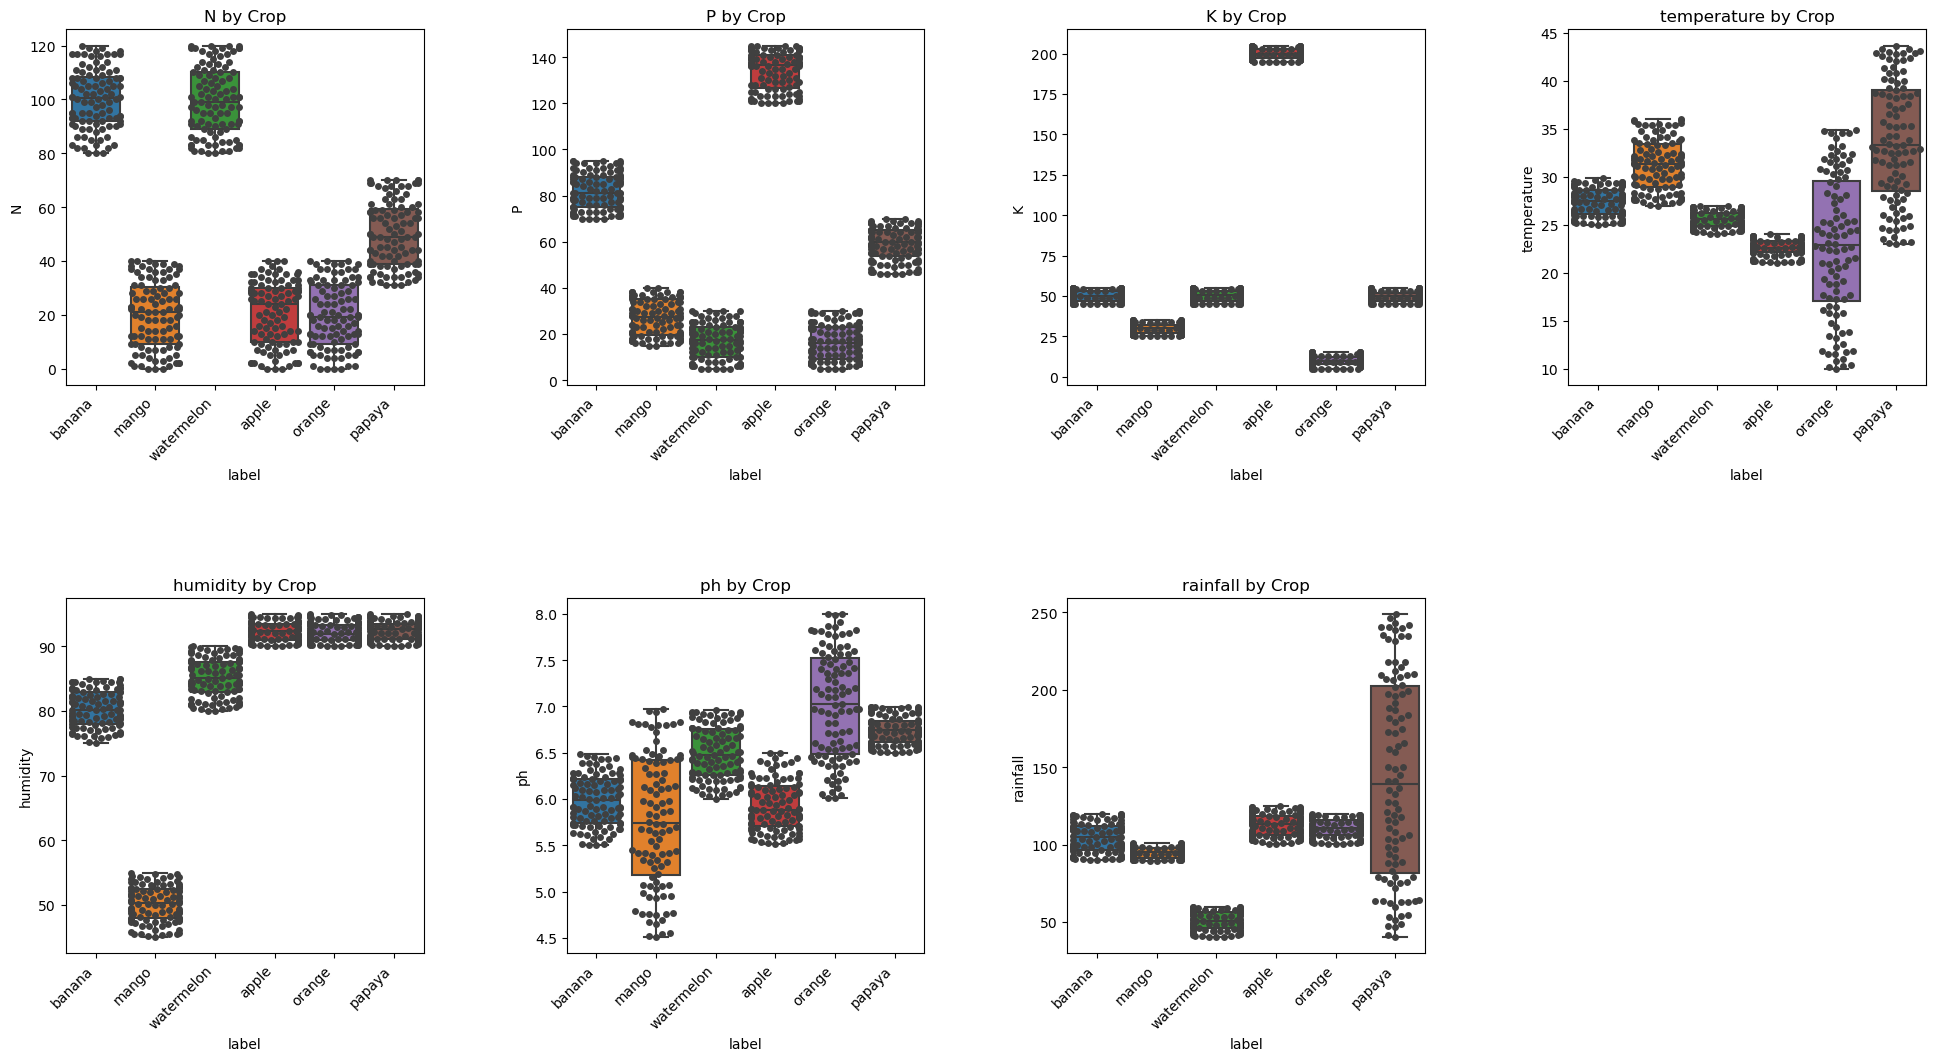

In [10]:
# Assuming 'df_fruits' is your DataFrame and 'features' is defined
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Create a subplot grid
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(24, 12), gridspec_kw={'hspace': 0.6, 'wspace': 0.4})

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    sns.boxplot(x='label', y=feature, data=df_fruits, ax=axes[i])
    sns.swarmplot(x='label', y=feature, data=df_fruits, color=".25", ax=axes[i])
    axes[i].set_title(f'{feature} by Crop')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', fontsize=10)

# Remove the empty subplot (if any)
fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()


### Data Visualization on whole dataset with help of Histogram

### Histograms: Created to show the distribution of each numerical variable.

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


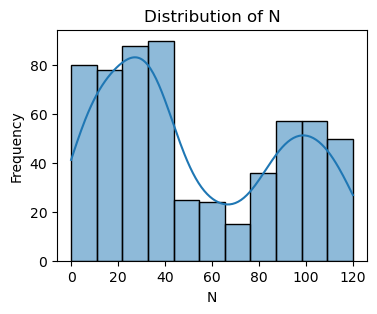

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


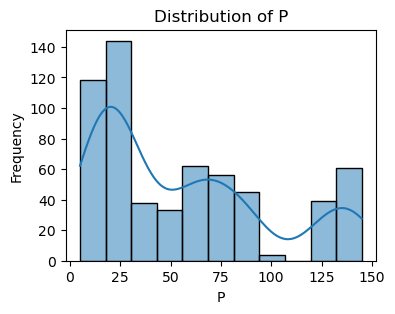

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


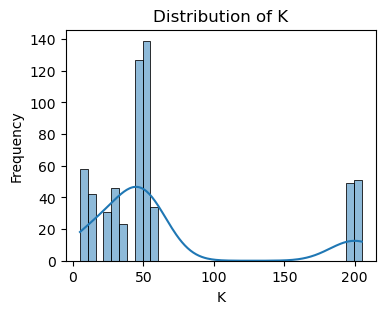

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


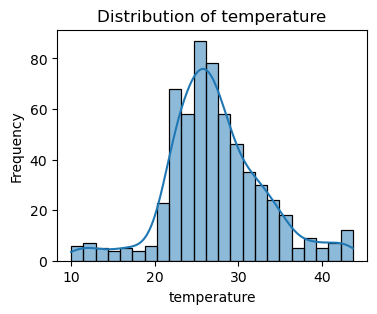

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


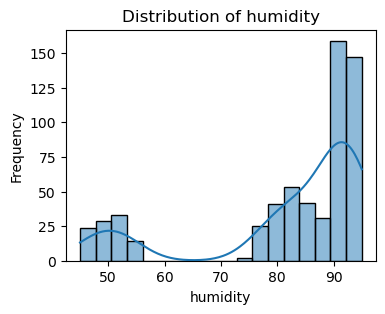

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


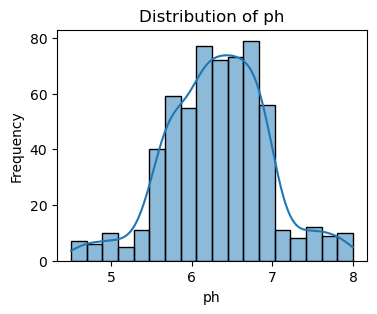

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


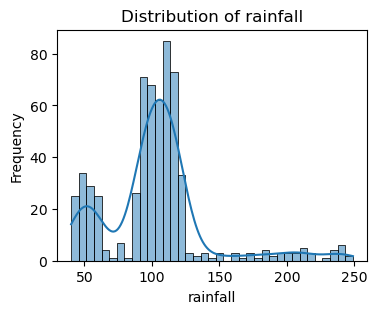

In [11]:
# Histograms for numerical variables
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in numerical_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(df_fruits[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### In this we also using same Visualization Technique but for specific Fruit Crop

Enter any food Crop:  apple


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


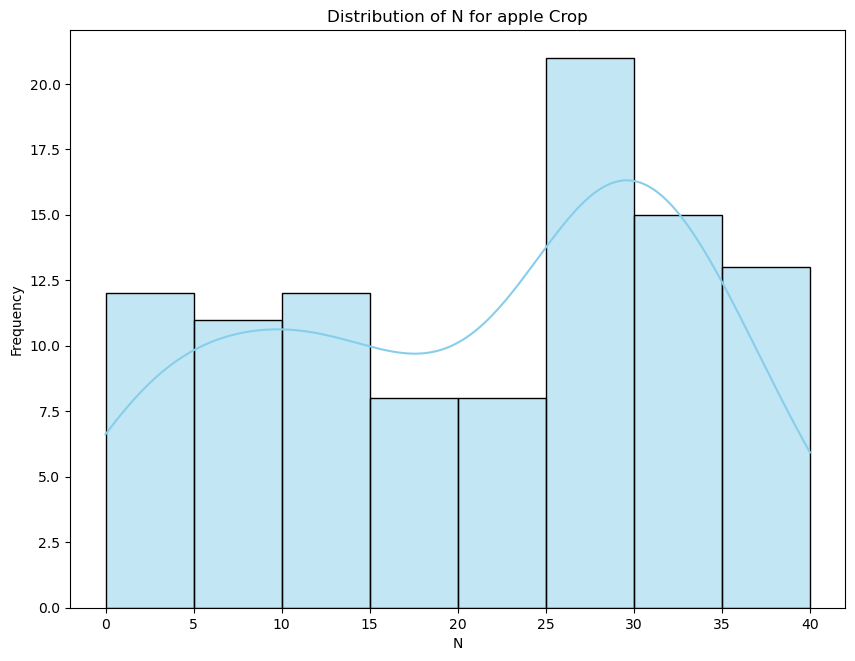

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


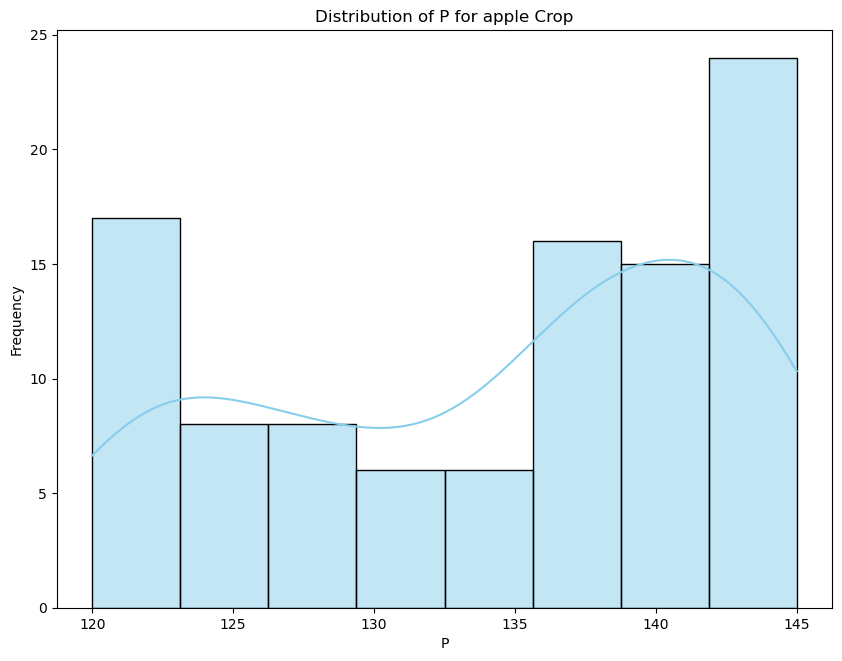

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


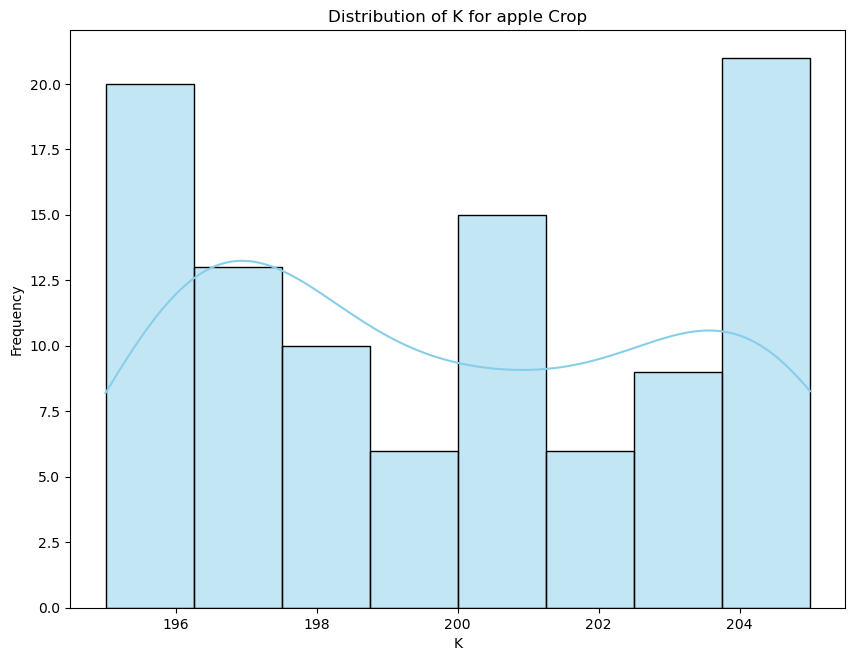

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


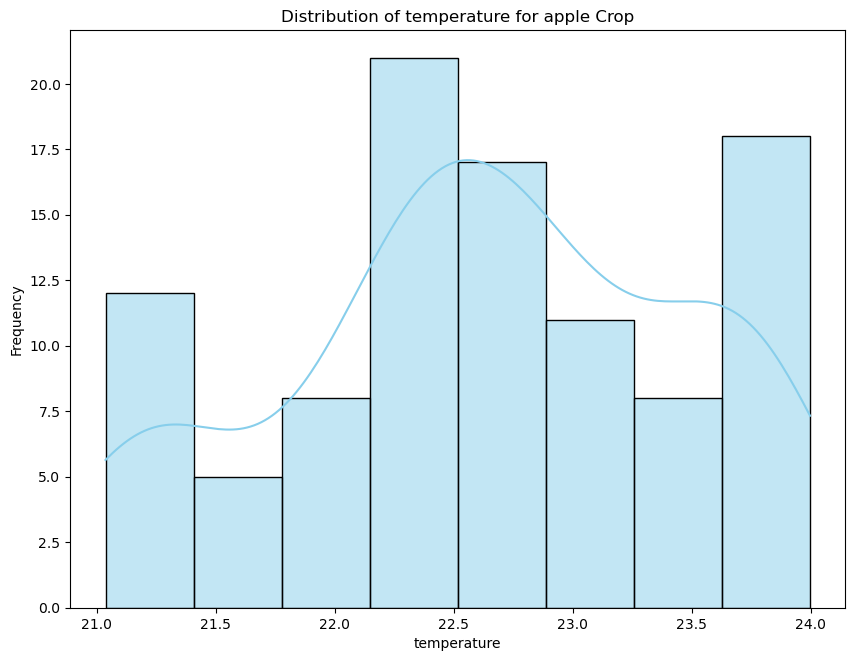

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


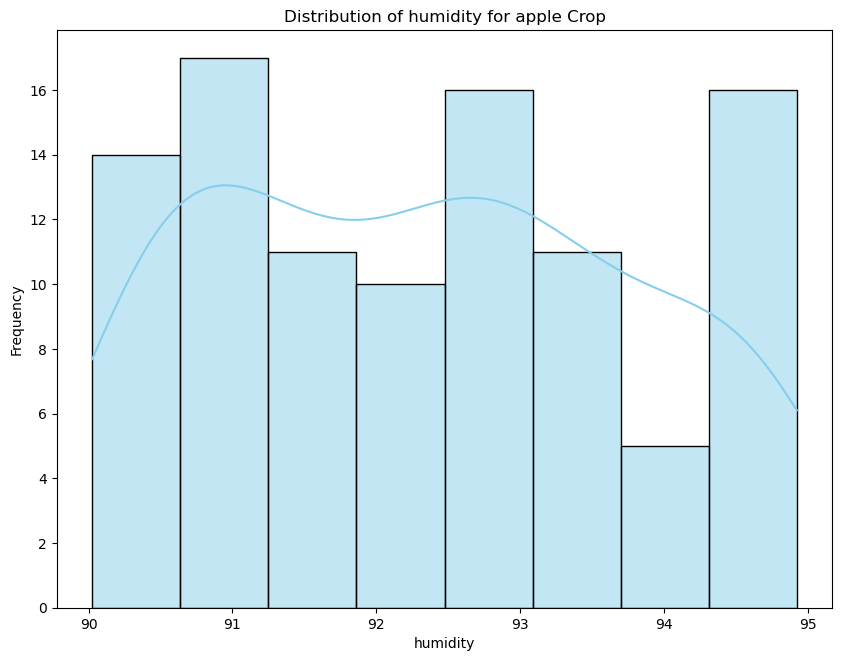

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


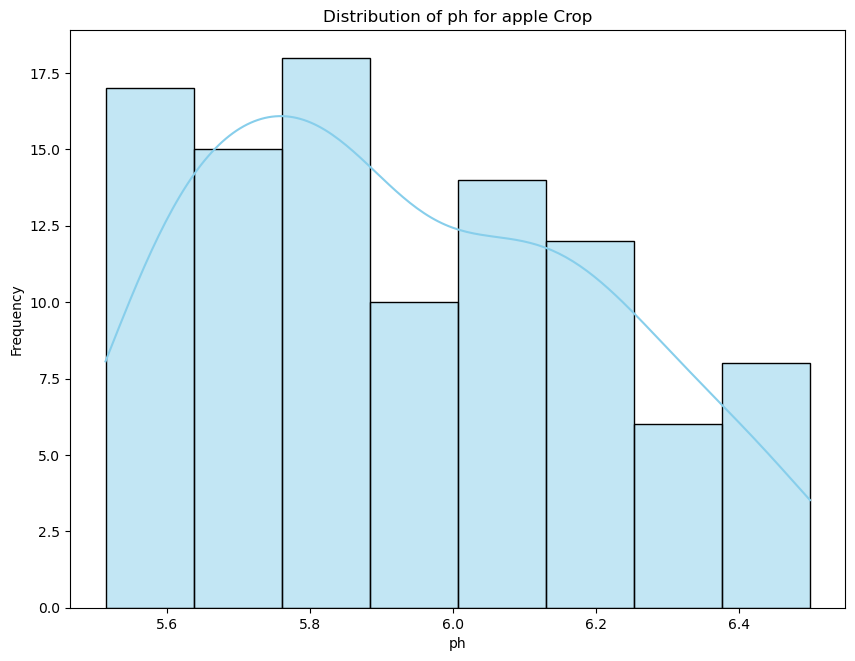

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


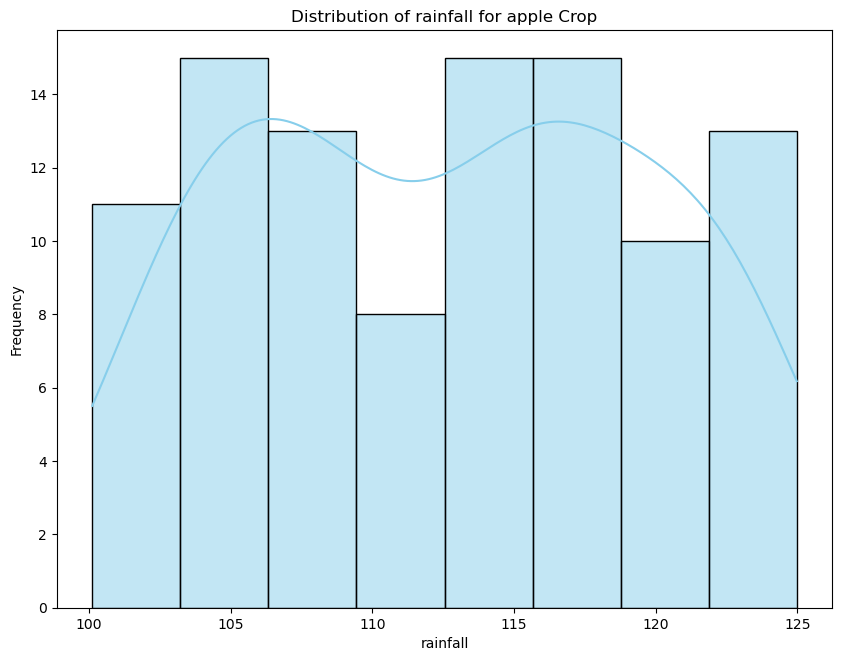

In [12]:
# Filter the dataframe to include only rows where the label is 'any specific crop'
crop = input("Enter any food Crop: ")
s_df = df_fruits[df_fruits['label'] == crop]

# Histograms for numerical variables related to specific crop
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for col in numerical_cols:
    plt.figure(figsize=(10, 7.5))
    sns.histplot(s_df[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col} for {crop} Crop')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Correlation among following features:
### N , P , K
### Rainfall and Temperature
### Humidity and pH
### Humidity , pH , Rainfall , Temperature

### Correlation Heatmaps: Generated to show the correlation between key features like N, P, K, rainfall, temperature, and humidity.

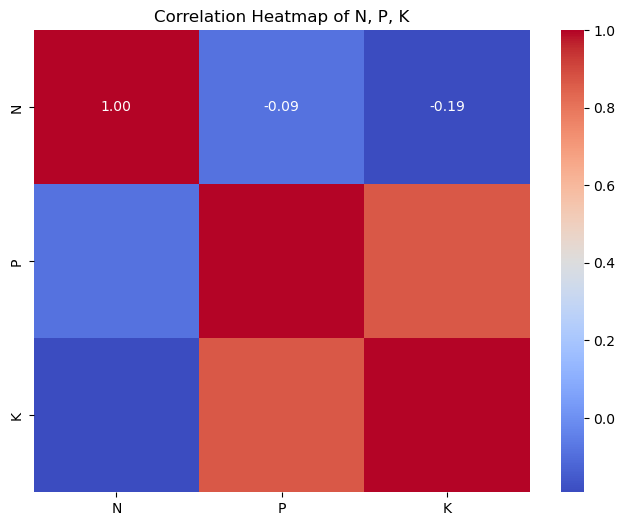

In [13]:
# Calculate the correlation matrix for N, P, and K
npk_corr = df_fruits[['N', 'P', 'K']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(npk_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of N, P, K')
plt.show()

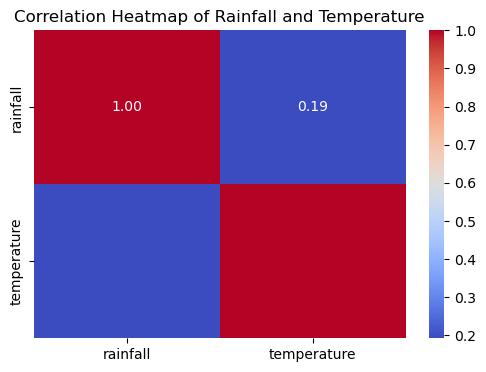

In [14]:
# Calculate the correlation matrix for rainfall and temperature
rain_temp_corr = df_fruits[['rainfall', 'temperature']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(rain_temp_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Rainfall and Temperature')
plt.show()

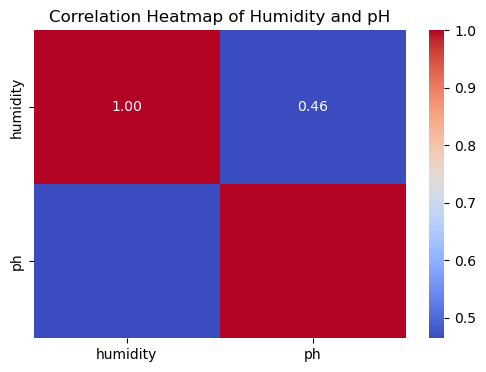

In [15]:
# Calculate the correlation matrix for humidity and pH
hum_ph_corr = df_fruits[['humidity', 'ph']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(hum_ph_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Humidity and pH')
plt.show()

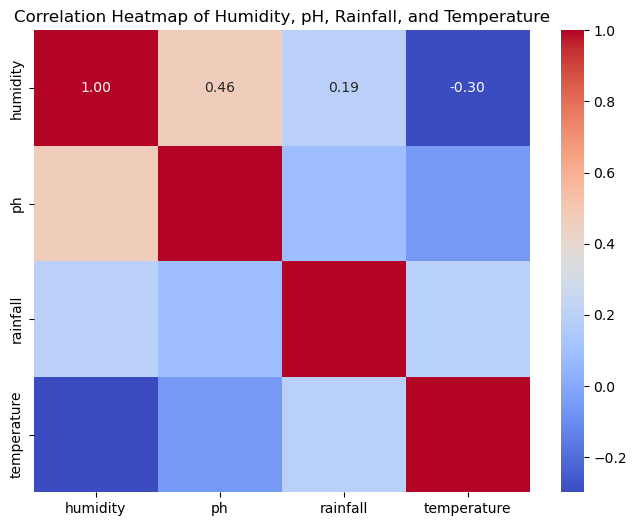

In [16]:
# Calculate the correlation matrix for humidity, pH, rainfall, and temperature
hum_ph_rain_temp_corr = df_fruits[['humidity', 'ph', 'rainfall', 'temperature']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(hum_ph_rain_temp_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Humidity, pH, Rainfall, and Temperature')
plt.show()

### Correlation matrix for all features:

Correlation Matrix:
                     N         P         K  temperature  humidity        ph  \
N            1.000000 -0.087414 -0.191431     0.069242  0.121975 -0.002235   
P           -0.087414  1.000000  0.866705    -0.140282  0.303902 -0.348472   
K           -0.191431  0.866705  1.000000    -0.271391  0.314545 -0.322952   
temperature  0.069242 -0.140282 -0.271391     1.000000 -0.298739 -0.057972   
humidity     0.121975  0.303902  0.314545    -0.298739  1.000000  0.464243   
ph          -0.002235 -0.348472 -0.322952    -0.057972  0.464243  1.000000   
rainfall    -0.339739  0.292547  0.090816     0.192414  0.194602  0.088747   

             rainfall  
N           -0.339739  
P            0.292547  
K            0.090816  
temperature  0.192414  
humidity     0.194602  
ph           0.088747  
rainfall     1.000000  


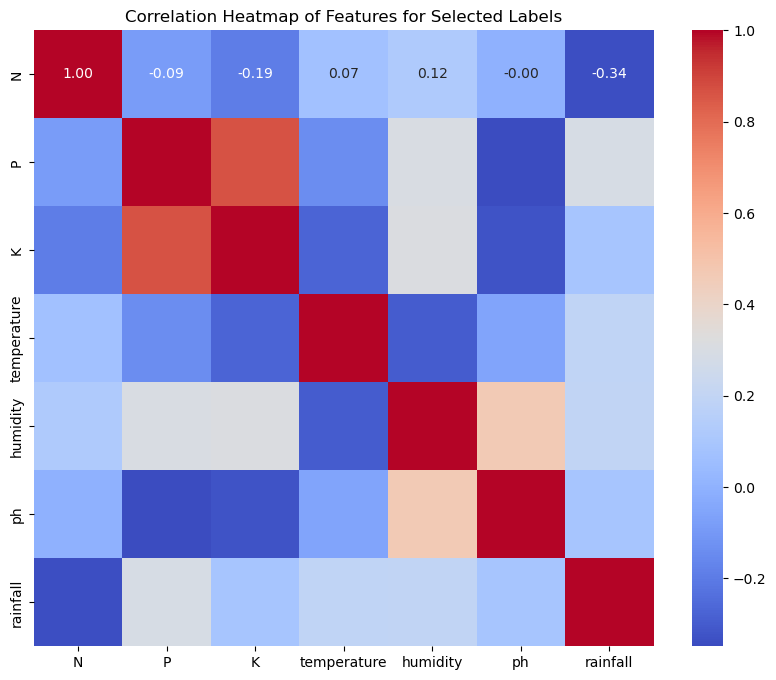

In [17]:
# Calculate the correlation matrix for the filtered dataset
correlation_matrix = df_fruits[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()

# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features for Selected Labels')
plt.show()

## Selecting crop from the list and visualizng specific feature relationships for the selected crop
### 'rainfall' vs 'ph'
### 'temperature' vs 'humidity'
### 'rainfall' vs 'temperature'

### SCATTER PLOT:

### The scatter plot function is designed to visualize the relationship between pairs of features for specific crops. By plotting these relationships, we can gain insights into how different environmental factors interact and influence the growth conditions of each crop.

Available crops:  banana, mango, watermelon, apple, papaya, orange


Enter the crop name from the list above:  orange


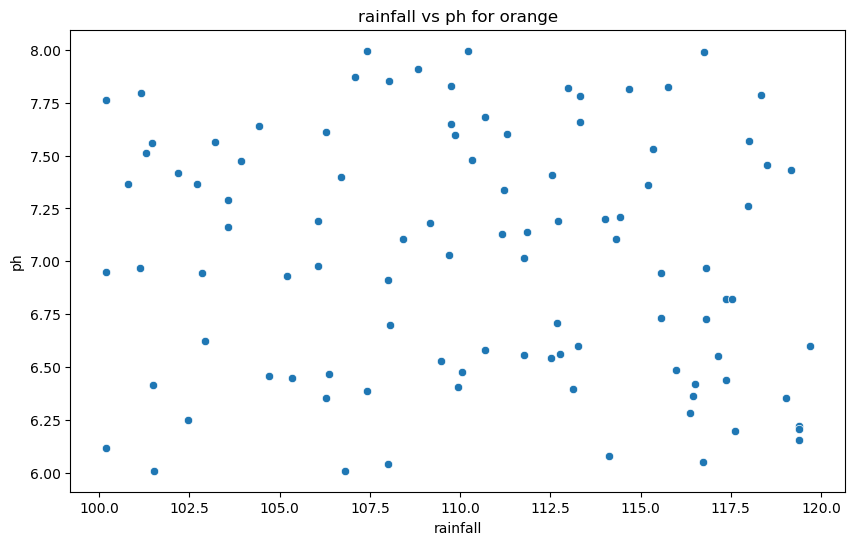

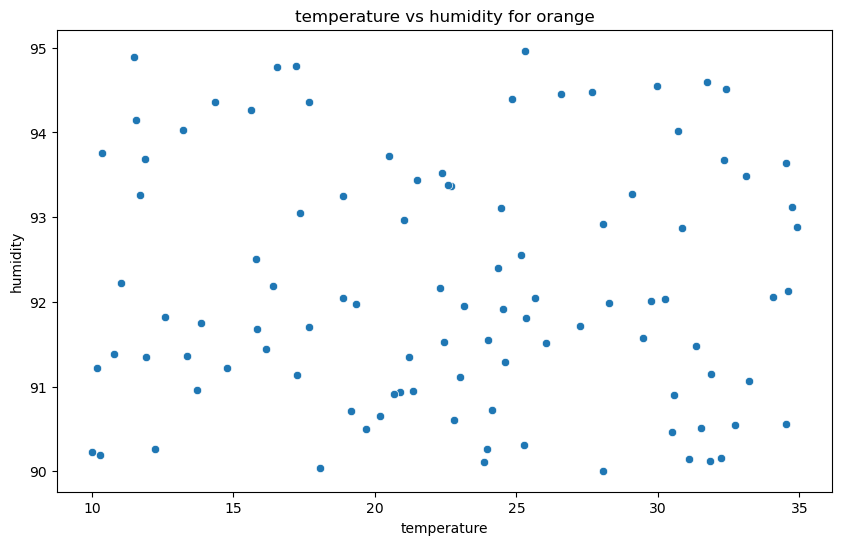

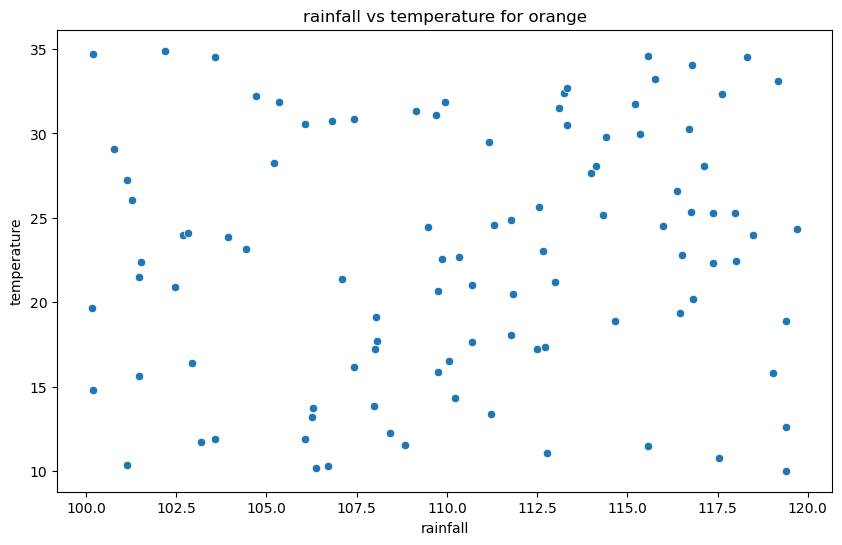

In [18]:
crops = ['banana', 'mango', 'watermelon', 'apple', 'papaya', 'orange']
# Plotting function
def plot_features(crop, feature_x, feature_y):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_fruits[df_fruits['label'] == crop], x=feature_x, y=feature_y)
    plt.title(f'{feature_x} vs {feature_y} for {crop}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.show()

# Function to prompt user for crop selection and visualize
def visualize_crop():
    print("Available crops: ", ", ".join(crops))
    crop = input("Enter the crop name from the list above: ").strip().lower()
    
    if crop in crops:
        plot_features(crop, 'rainfall', 'ph')
        plot_features(crop, 'temperature', 'humidity')
        plot_features(crop, 'rainfall', 'temperature')
    else:
        print("Invalid crop name. Please try again.")
        visualize_crop()

# Call the function to prompt user and visualize
visualize_crop()

### Histogram:

### The histogram plotting function is intended to visualize the distribution of key features for specific crops. Histograms show the frequency distribution of a single feature, which helps in understanding the central tendency, spread, and skewness of the data.

Available crops:  banana, mango, watermelon, apple, papaya, orange


Enter the crop name from the list above:  papaya


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


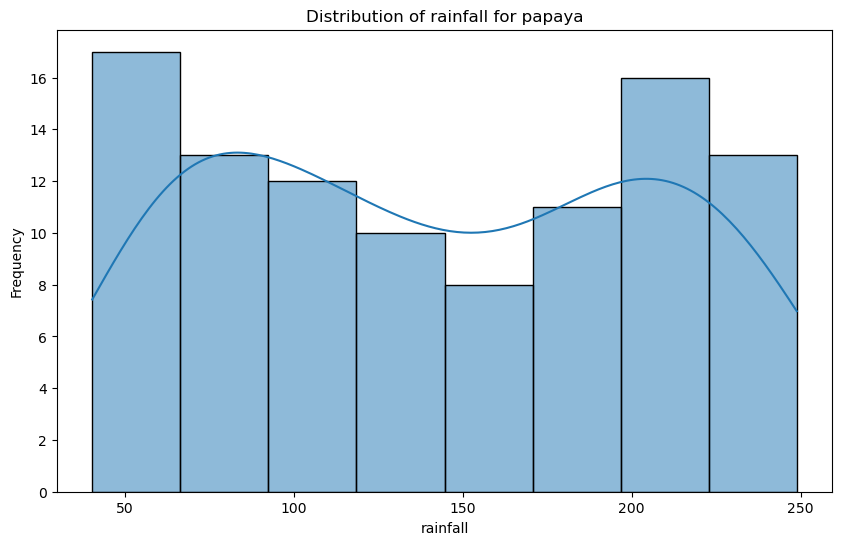

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


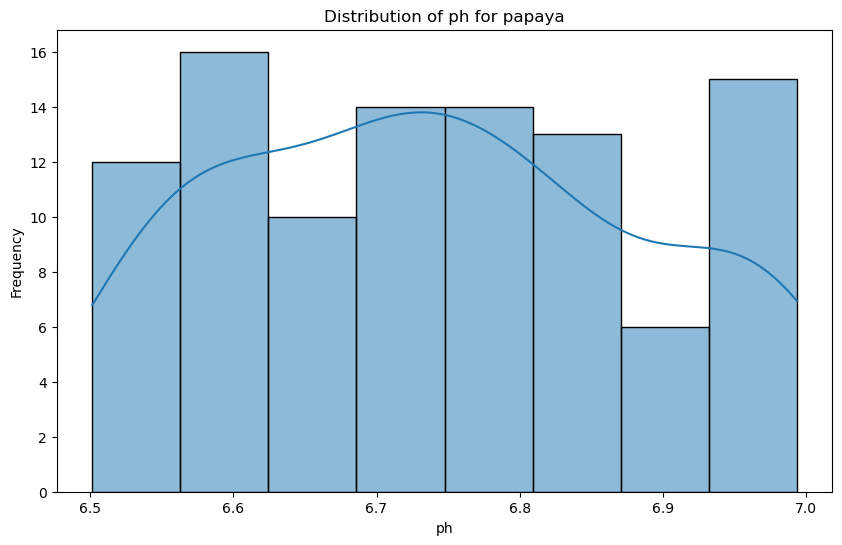

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


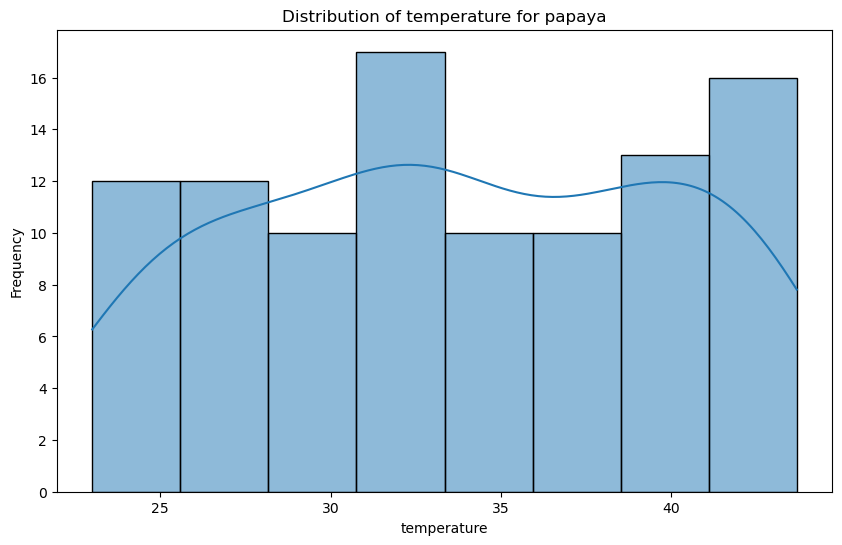

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


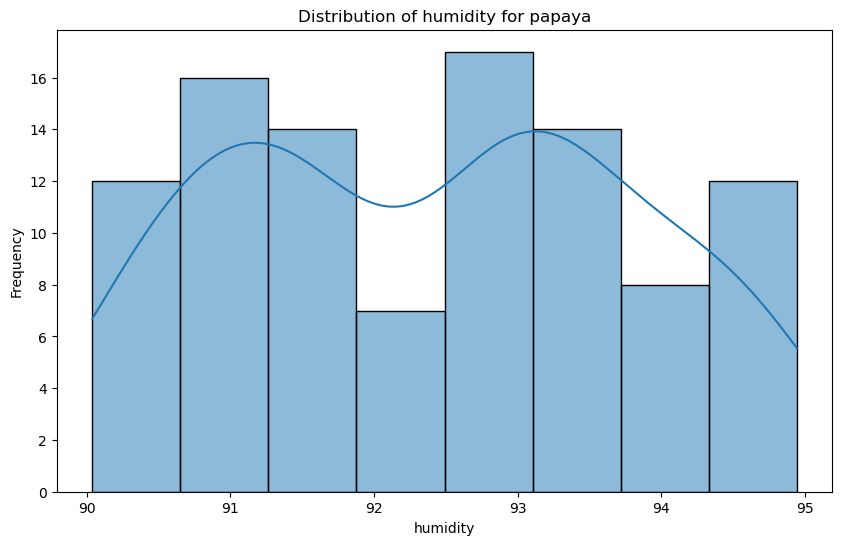

In [19]:
# Filter the dataset for the specified crops
crops = ['banana', 'mango', 'watermelon', 'apple', 'papaya', 'orange']

# Plotting function
def plot_histograms(crop, feature):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df_fruits[df_fruits['label'] == crop], x=feature, kde=True)
    plt.title(f'Distribution of {feature} for {crop}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Function to prompt user for crop selection and visualize
def visualize_crop():
    print("Available crops: ", ", ".join(crops))
    crop = input("Enter the crop name from the list above: ").strip().lower()
    
    if crop in crops:
        plot_histograms(crop, 'rainfall')
        plot_histograms(crop, 'ph')
        plot_histograms(crop, 'temperature')
        plot_histograms(crop, 'humidity')
    else:
        print("Invalid crop name. Please try again.")
        visualize_crop()

# Call the function to prompt user and visualize
visualize_crop()

# ii. PREPROCESSING:

### Partitioning Data

In [20]:
X = df_fruits[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df_fruits['label']

In [21]:
unique_labels_count = df_fruits['label'].nunique()
print("Number of unique labels:", unique_labels_count)

Number of unique labels: 6


### Fruit mapping
fruits = {'banana': 1, 'mango': 2, 'watermelon': 3, 'apple': 4, 'papaya': 5, 'orange': 6}

## Feature selection by different techniques:

### We have used 4 techniues for the feature selection. Following are the reasons of each technique used on the dataset.

#### 1. Correlation Analysis: Porpose is to To identify the features that have a strong linear relationship with the target variable (crop label). Helps in identifying features that have a strong linear relationship with the target variable.

#### 2. Feature Importance: To determine the importance of each feature in predicting the target variable using an ensemble method. Provides a ranking of features based on their importance in predicting the target variable.

#### 3. Recursive Feature Elimination (RFE):To select the most important features by recursively considering smaller sets of features. Provides a systematic way of selecting features by considering the interaction between features and their individual contributions.

#### 4. SelectKBest with ANOVA F-value: To select the top k features that have the highest correlation with the target variable based on the ANOVA F-value. Provides a straightforward statistical method for feature selection based on the variance between feature values across different classes of the target variable.

In [22]:
# Encoding label values to convert string to float
fruits = {'banana': 1, 'mango': 2, 'watermelon': 3, 'apple': 4, 'papaya': 5, 'orange': 6}

# encoding
df_fruits['label'] = df['label'].map(fruits)

# 1. Correlation Analysis
correlation_matrix = df_fruits[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']].corr()
selected_features_corr = correlation_matrix.index[np.abs(correlation_matrix['label']) > 0.5].tolist()

# 2. Feature Importance
X = df_fruits[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df_fruits['label']

rf_model = RandomForestClassifier()
rf_model.fit(X, y)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
selected_features_importance = feature_importances.nlargest(5).index.tolist()

# 3. Recursive Feature Elimination (RFE)
model = LogisticRegression()
rfe = RFE(model)
fit = rfe.fit(X, y)
selected_features_rfe = X.columns[fit.support_].tolist()

# 4. SelectKBest with ANOVA F-value
k_best = SelectKBest(score_func=f_classif, k=5)
fit = k_best.fit(X, y)
selected_features_anova = X.columns[fit.get_support()].tolist()

print("Selected features using Correlation Analysis:", selected_features_corr)
print("Selected features using Feature Importance:", selected_features_importance)
print("Selected features using RFE:", selected_features_rfe)
print("Selected features using ANOVA:", selected_features_anova)

C:\Users\Arshad Ahmed\AppData\Local\Temp\ipykernel_14428\2933829531.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fruits['label'] = df['label'].map(fruits)


Selected features using Correlation Analysis: ['N', 'humidity', 'ph', 'label']
Selected features using Feature Importance: ['P', 'K', 'humidity', 'N', 'rainfall']
Selected features using RFE: ['P', 'temperature', 'humidity']
Selected features using ANOVA: ['N', 'P', 'K', 'humidity', 'ph']


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

#### Hence each is giving separate features according to there criterias:
#### ANOVA and Feature Importance has N , P , K and humidity common in them so We are selecting these 4  features
### N , P , K and Humidity

### Split the data into training and testing sets:

In [23]:
# Selected features
selected_features = ['N', 'P', 'K', 'humidity']

# Features and target variable
X = df_fruits[selected_features]
y = df_fruits['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (480, 4)
Testing features shape: (120, 4)
Training labels shape: (480,)
Testing labels shape: (120,)


In [24]:
X.head() #Checking X head

,N,P,K,humidity
1000,91,94,46,76.249001
1001,105,95,50,83.676752
1002,108,92,53,82.962213
1003,86,76,54,80.115857
1004,80,77,49,79.396545


In [25]:
y.unique() #Checking Y head

array([1., 2., 3., 4., 6., 5.])

# iii. COMPARISON AND EVALUATION:

## Machine learning models training:

### We are using variety of classification models for training on our dataset allowing us to compare their performances and select the best one for the specific problem of crop recommendation.

### Following are the models we are using and their purpose:

#### Decision Tree: Decision Trees are used because they are simple to understand and interpret. They can handle both numerical and categorical data without requiring feature scaling.

#### k-Nearest Neighbors (k-NN): k-NN is a non-parametric, instance-based learning algorithm. It’s simple and effective for small datasets and provides a good baseline for classification problems.

#### Random Forest: Random Forest is an ensemble learning method that combines multiple decision trees to improve accuracy and control overfitting. It’s robust and works well with a variety of datasets.

#### Gradient Boosting: Gradient Boosting is another ensemble method that builds trees sequentially to correct the errors of the previous ones. It’s effective for improving accuracy on complex datasets.

#### Support Vector Machine (SVM): SVMs are powerful for high-dimensional spaces and effective in cases where the number of dimensions exceeds the number of samples. They are used to find a hyperplane that best separates the classes.

In [26]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the classification models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=10, random_state=42), #Model-based
    'k-NN': KNeighborsClassifier(n_neighbors=5), #statistical
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42), #Model-based
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42), #Model-based
    'SVM': SVC(C=1.0, kernel='rbf', gamma='scale', random_state=42) #statistical
}

# Train and evaluate each model on the test set
for model_name, model in models.items():
    if model_name in ['k-NN', 'SVM']:
        model.fit(X_train_scaled, y_train)  # Use scaled data for k-NN and SVM
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # Use original data for other models
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model_name}, Accuracy Score: {accuracy}")


Model: Decision Tree, Accuracy Score: 1.0
Model: k-NN, Accuracy Score: 1.0
Model: Random Forest, Accuracy Score: 1.0
Model: Gradient Boosting, Accuracy Score: 1.0
Model: SVM, Accuracy Score: 1.0


### Visualization of the accuracy by each model. These hardcoded values are the initial values that we achieved but after rerunning the cell all models gives 100 eprcent accuracy.
### Hence these accuracies are not causing overfitting in testing cell

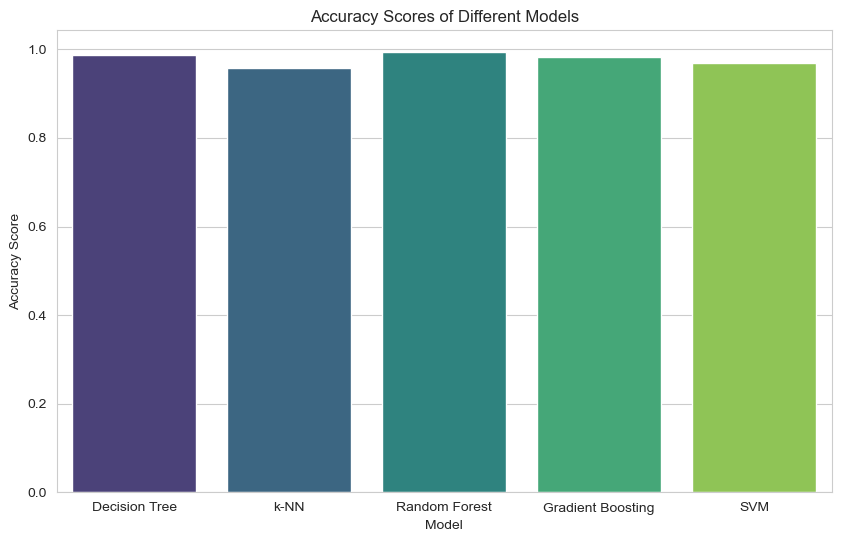

In [27]:
# Data for the models and their accuracy scores
data = {
    'Model': ['Decision Tree', 'k-NN', 'Random Forest', 'Gradient Boosting', 'SVM'],
    'Accuracy Score': [0.9863636363636363, 0.9568181818181818, 0.9931818181818182, 0.9818181818181818, 0.9681818181818181]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy Score', data=df, palette='viridis')

# Add title and labels
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')

# Show the plot
plt.show()

### Hence all models are giving 100% accuracy. We are using Random forest model

### Random Forest Classifier to predict fruit labels based on selected features ('N', 'P', 'K', 'humidity'). The dataset is split into training and testing sets, with 20% of the data reserved for testing. The Random Forest model is trained on the training data and used to predict labels for the test data. Finally, the accuracy of the model is calculated and printed. The reported accuracy indicates how well the model performed in predicting the fruit labels on the test set.

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Selected features
selected_features = ['N', 'P', 'K', 'humidity']

# Features and target variable
X = df_fruits[selected_features]
y = df_fruits['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)
print(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


[2. 6. 5. 1. 2. 3. 1. 6. 1. 4. 1. 2. 2. 5. 4. 3. 1. 3. 2. 1. 1. 5. 5. 5.
 4. 5. 1. 2. 5. 6. 5. 2. 1. 3. 2. 6. 2. 5. 6. 3. 4. 1. 5. 5. 1. 2. 6. 2.
 1. 6. 3. 3. 2. 5. 5. 4. 3. 2. 2. 2. 1. 2. 4. 5. 5. 1. 5. 5. 1. 4. 4. 1.
 6. 4. 6. 5. 4. 3. 5. 6. 3. 6. 5. 4. 1. 1. 2. 3. 4. 3. 3. 5. 1. 4. 3. 3.
 3. 1. 6. 1. 1. 3. 5. 4. 1. 6. 2. 3. 3. 6. 2. 6. 5. 5. 4. 4. 4. 2. 6. 6.]
Accuracy:  1.0


In [29]:
df_fruits[df_fruits['label'] == 2]

,N,P,K,temperature,humidity,ph,rainfall,label
1100,2,40,27,29.737700,47.548852,5.954627,90.095869,2.0
1101,39,24,31,33.556956,53.729798,4.757115,98.675276,2.0
1102,21,26,27,27.003155,47.675254,5.699587,95.851183,2.0
1103,25,22,25,33.561502,45.535566,5.977414,95.705259,2.0
1104,0,21,32,35.898556,54.259642,6.430139,92.197217,2.0
...,...,...,...,...,...,...,...,...
1195,19,38,26,31.484517,48.779263,4.525722,93.172220,2.0
1196,21,21,30,27.698193,51.415932,5.403908,100.772070,2.0
1197,22,18,33,30.412358,52.481006,6.621624,93.923759,2.0
1198,31,20,30,32.177520,54.013527,6.207496,91.887661,2.0


#### The `get_fruit` function maps numerical values to their corresponding fruit names. It iterates through the `fruits` dictionary, matching the input value with the dictionary's values. If a match is found, it returns the associated fruit name; otherwise, it returns `None`. This function serves as a tool to convert numerical labels into their respective fruit names.

In [30]:
def get_fruit(value):
    for k, v in fruits.items():
        if v == value:
            return k
    return None

## Testing and Prediction of crop on the random values of features:

In [34]:
y_pred = rf.predict([[21, 21, 30, 51]])
print(get_fruit(y_pred))

mango


D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
